In [1]:
import numpy as np, matplotlib.pyplot as plt
import os
from scipy import interpolate
from astropy.convolution import convolve_fft, Gaussian1DKernel
from glob import glob

In [168]:
with open('color_mag.csv', 'r') as file:
    rows = file.readlines()
#print(rows)
data = []
for row in rows:
    row = row.strip('\n')
    cols = row.split(',')
    data.append(cols)
data.pop(0)
#print(data)

num = []
J_K = []
dJ_K = []
Mj = []
for i in range(len(data)):
    num.append(data[i][0])
    J_K.append(data[i][1])
    dJ_K.append(data[i][2])
    Mj.append(data[i][3])

num = [eval(i) for i in num]
J_K = [eval(i) for i in J_K]
Mj = [eval(i) for i in Mj]

msfire = np.loadtxt('/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118.txt')
wave = msfire[:, 0] # wavelength in Å
wave_um = msfire[:, 0] * 1e-4 # wavelength in µm
flux = msfire[:, 1] # erg/cm^2/s/Å
unc = msfire[:, 2] # erg/cm^2/s/Å
#plt.figure(figsize = (20, 12))
#plt.plot(wave_um * 1e4, flux, color = 'black', linewidth = 0.5, label = 'R = 3529')
#plt.axvline(11110)
#plt.axvline(13770)
#plt.axvline(14650)
#plt.axvline(17970)
#plt.axvline(19530)
#plt.axvline(23960)
#plt.xlim(19530, 24000)

#Jflux = flux[11110:13770]
#Hflux = flux[14650:17970]
#Kflux = flux[19530:23960]

In [183]:
Jmin = 11110
Jmax = 13770
Kmin = 19520
Kmax = 23960

Jmask = (wave >= Jmin) & (wave <= Jmax)
Kmask = (wave >= Kmin) & (wave <= Kmax)
Jwave = wave[Jmask]
Jflux = flux[Jmask]
Kwave = wave[Kmask]
Kflux = flux[Kmask]

Jflux_av = np.average(Jflux)
Kflux_av = np.average(Kflux)

ZPj = 27.89
ZPk = 26.93

m_J = -2.5 * np.log10(Jflux_av) + ZPj
m_K = -2.5 * np.log10(Kflux_av) + ZPk

JminusK = m_J - m_K

r_jup_km = 69911 # km
r_jup_A = r_jup_km * 1e13 # A
r_jup_ps = r_jup_km / 3.086e13
parallax = 0.0704 # arcseconds
d_ly = 1 / parallax
d_km = d_ly * 9.461e12
d_ps = d_ly / 3.262
d_A = d_km * 1e13
scale_km = (r_jup_km ** 2) / (d_km ** 2)
scale_A = (r_jup_A ** 2) / (d_A ** 2)
scale_ps = (r_jup_ps ** 2) / (d_ps ** 2)

M_j = (m_J - 5 * np.log10(scale_ps) + 5) / 10
print(f'mJ: {m_J}\nmK: {m_K}\nJ-K: {JminusK}\nMj: {M_j}')

mJ: 59.57231953302601
mK: 60.40818695789069
J-K: -0.8358674248646807
Mj: 15.741025744904793


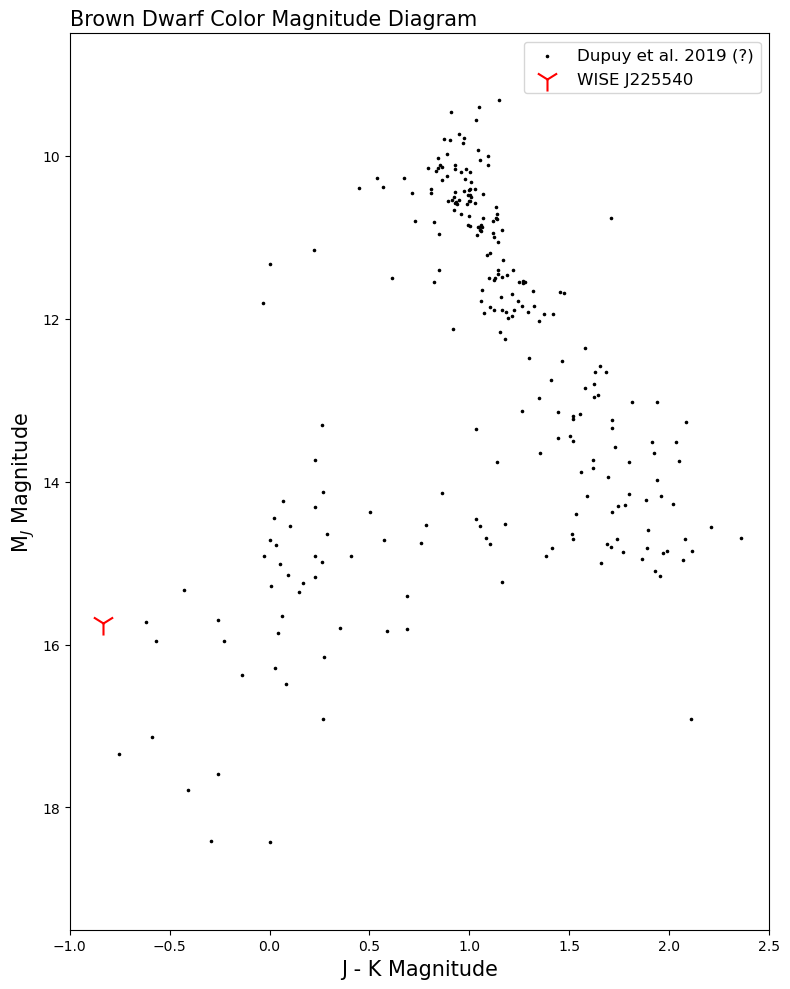

In [194]:
plt.figure(figsize = (8, 10))
plt.scatter(J_K, Mj, color = 'black', marker = '.', s = 10, label = 'Dupuy et al. 2019 (?)')
plt.scatter(JminusK, M_j, color = 'red', marker = '1', s = 300, label = 'WISE J225540')
plt.title('Brown Dwarf Color Magnitude Diagram', loc = 'left', fontsize = 15)
plt.xlabel('J - K Magnitude', fontsize = 15)
plt.ylabel('M$_J$ Magnitude', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks([10, 12, 14, 16, 18], fontsize = 10)
plt.legend(loc = 'best', fontsize = 12)
plt.gca().invert_yaxis()
plt.xlim(-1, 2.5)
plt.ylim(19.5, 8.5)
plt.tight_layout()
plt.savefig('CM Diag 1')